## Testes Biblioteca "frbs"

In [ ]:
install.packages("frbs") #rodar somente uma vez

In [1]:
library(frbs)#carregando as funções

In [ ]:
library(help=frbs) # documentação da biblioteca

### Exemplo 1 -  Simulando Regressão

Prevendo um output baseado com o input de uma função

2 variáveis de input $x \in [-2,2]$ e  $y \in [-2,2]$


$$ f(x,y) = \frac{1}{x^{4} + y^{4} -2x^{2} - 2y^{2} +3 } $$

In [2]:
fun <- function(input.xy){ z <- 1/(input.xy[1]^4+input.xy[2]^4 -2*input.xy[1]^2-2*input.xy[2]^2+3)}

In [3]:
fun

function(input.xy){ z <- 1/(input.xy[1]^4+input.xy[2]^4 -2*input.xy[1]^2-2*input.xy[2]^2+3)}

In [4]:
input.xy <- expand.grid(seq(-2, 2, by = 0.14),
    + seq(-2, 2, by = 0.14))

In [5]:
head(input.xy,15)

Var1,Var2
-2.00,-2
-1.86,-2
-1.72,-2
-1.58,-2
-1.44,-2
-1.30,-2
-1.16,-2
-1.02,-2
-0.88,-2
-0.74,-2


obs - função apply 
* X is an array or matrix;
* MARGIN is a variable that determines whether the function is applied over rows (MARGIN=1), columns (MARGIN=2), or both (MARGIN=c(1,2));
* FUN is the function to be applied.


In [8]:
#parâmetro 1...aplica sobre as linhas da matriz a função fun
z<- apply(input.xy, 1, fun)

In [9]:
head(z,15)

[1] 0.05263158 0.06230672 0.07227872 0.08170460 0.08966505 0.09545537
 [7] 0.09881970 0.09998368 0.09949362 0.09799439 0.09606517 0.09414800
[13] 0.09254387 0.09143902 0.09093552

In [10]:
data <- cbind(input.xy, z)

In [11]:
head(data,15)

Var1,Var2,z
-2.00,-2,0.05263158
-1.86,-2,0.06230672
-1.72,-2,0.07227872
-1.58,-2,0.08170460
-1.44,-2,0.08966505
-1.30,-2,0.09545537
-1.16,-2,0.09881970
-1.02,-2,0.09998368
-0.88,-2,0.09949362
-0.74,-2,0.09799439


In [12]:
colnames(data)<- c("X","Y","Z")

In [13]:
head(data,5)

X,Y,Z
-2.00,-2,0.05263158
-1.86,-2,0.06230672
-1.72,-2,0.07227872
-1.58,-2,0.08170460
-1.44,-2,0.08966505


In [14]:
dim(data)

[1] 841   3

In [15]:
cut.indx <- round(0.8*nrow(data))

In [17]:
cut.indx

[1] 673

In [18]:
#definindo os dados de treino
data.tra <- data[1:cut.indx,]

In [19]:
head(data.tra,15) #treino

X,Y,Z
-2.00,-2,0.05263158
-1.86,-2,0.06230672
-1.72,-2,0.07227872
-1.58,-2,0.08170460
-1.44,-2,0.08966505
-1.30,-2,0.09545537
-1.16,-2,0.09881970
-1.02,-2,0.09998368
-0.88,-2,0.09949362
-0.74,-2,0.09799439


In [20]:
dim(data.tra)

[1] 673   3

In [21]:
data.tst <- data[(cut.indx+1):nrow(data),1:2]#dados para teste

In [22]:
head(data.tst,15)

,X,Y
674,-1.16,1.22
675,-1.02,1.22
676,-0.88,1.22
677,-0.74,1.22
678,-0.60,1.22
679,-0.46,1.22
680,-0.32,1.22
681,-0.18,1.22
682,-0.04,1.22
683,0.10,1.22


In [23]:
dim(data.tst)

[1] 168   2

In [24]:
real.val <- data[(cut.indx+1):nrow(data),3,drop=FALSE] #dados para avaliar a acurácia r/

In [25]:
head(real.val,15)

,Z
674,0.7363912
675,0.8063432
676,0.7755365
677,0.6929045
678,0.6067466
679,0.5376029
680,0.4891841
681,0.4598157
682,0.4473598
683,0.4507277


In [27]:
dim(real.val)

[1] 168   1

In [28]:
range.data <- apply(data,2,range) #definir o piso e o teto

In [29]:
range.data

X,Y,Z
-2.00,-2.00,0.05263158
1.92,1.92,0.99674630


In [30]:
#agora settar os parâmetros para a aprendizagem
method.type <- "WM" #Wand and Mendels method("WM")


In [31]:
method.type

[1] "WM"

In [32]:
#fourhill é o nome da simulação #só possso definir um tipo de mf ?????
control <- list(num.labels = 5,type.mf = "GAUSSIAN", type.defuz = "COG",type.tnorm = "MIN", type.snorm = "MAX",type.implication.func = "LUKASIEWICZ",name="fourhill")

In [33]:
control

$num.labels
[1] 5

$type.mf
[1] "GAUSSIAN"

$type.defuz
[1] "COG"

$type.tnorm
[1] "MIN"

$type.snorm
[1] "MAX"

$type.implication.func
[1] "LUKASIEWICZ"

$name
[1] "fourhill"

Agora ele vai aplicar a aprendizagem em si 
 * data.tra-- Dados de treino
 * range.data-- Intervalor de trabalho dos dados 
 * method.type -- o tipo de métodos WM 
 * control -- os parâmetros do conjunto fuzzy em si

In [35]:
mod.reg <-frbs.learn(data.tra,range.data,method.type,control)

In [36]:
mod.reg

$num.labels
     [,1] [,2] [,3]
[1,]    5    5    5

$varout.mf
     very.small  small medium  large very.large
[1,]     5.0000 5.0000 5.0000 5.0000     5.0000
[2,]     0.0000 0.2500 0.5000 0.7500     1.0000
[3,]     0.0875 0.0875 0.0875 0.0875     0.0875
[4,]         NA     NA     NA     NA         NA
[5,]         NA     NA     NA     NA         NA

$rule
      [,1] [,2] [,3] [,4]         [,5]  [,6] [,7] [,8]         [,9]   [,10]
 [1,] "IF" "X"  "is" "very.small" "and" "Y"  "is" "very.small" "THEN" "Z"  
 [2,] "IF" "X"  "is" "small"      "and" "Y"  "is" "very.small" "THEN" "Z"  
 [3,] "IF" "X"  "is" "medium"     "and" "Y"  "is" "very.small" "THEN" "Z"  
 [4,] "IF" "X"  "is" "large"      "and" "Y"  "is" "very.small" "THEN" "Z"  
 [5,] "IF" "X"  "is" "very.large" "and" "Y"  "is" "very.small" "THEN" "Z"  
 [6,] "IF" "X"  "is" "small"      "and" "Y"  "is" "very.small" "THEN" "Z"  
 [7,] "IF" "X"  "is" "medium"     "and" "Y"  "is" "very.small" "THEN" "Z"  
 [8,] "IF" "X"  "is" "large"     

In [37]:
summary(mod.reg
       )

The name of model:  fourhill 
Model was trained using:  WM 
The names of attributes:  X Y Z 
The interval of training data:  
        X     Y          Z
min -2.00 -2.00 0.05263158
max  1.92  1.92 0.99674630
Type of FRBS model: 
[1] "MAMDANI"
Type of membership functions: 
[1] "GAUSSIAN"
Type of t-norm method: 
[1] "Standard t-norm (min)"
Type of s-norm method: 
[1] "Standard s-norm"
Type of defuzzification technique: 
[1] "modified COG"
Type of implication function: 
[1] "LUKASIEWICZ"
The names of linguistic terms on the input variables:  
 [1] "very.small" "small"      "medium"     "large"      "very.large"
 [6] "very.small" "small"      "medium"     "large"      "very.large"
The parameter values of membership function on the input variable (normalized):  
     very.small  small medium  large very.large very.small  small medium  large
[1,]     5.0000 5.0000 5.0000 5.0000     5.0000     5.0000 5.0000 5.0000 5.0000
[2,]     0.0000 0.2500 0.5000 0.7500     1.0000     0.0000 0.2500 0.5000

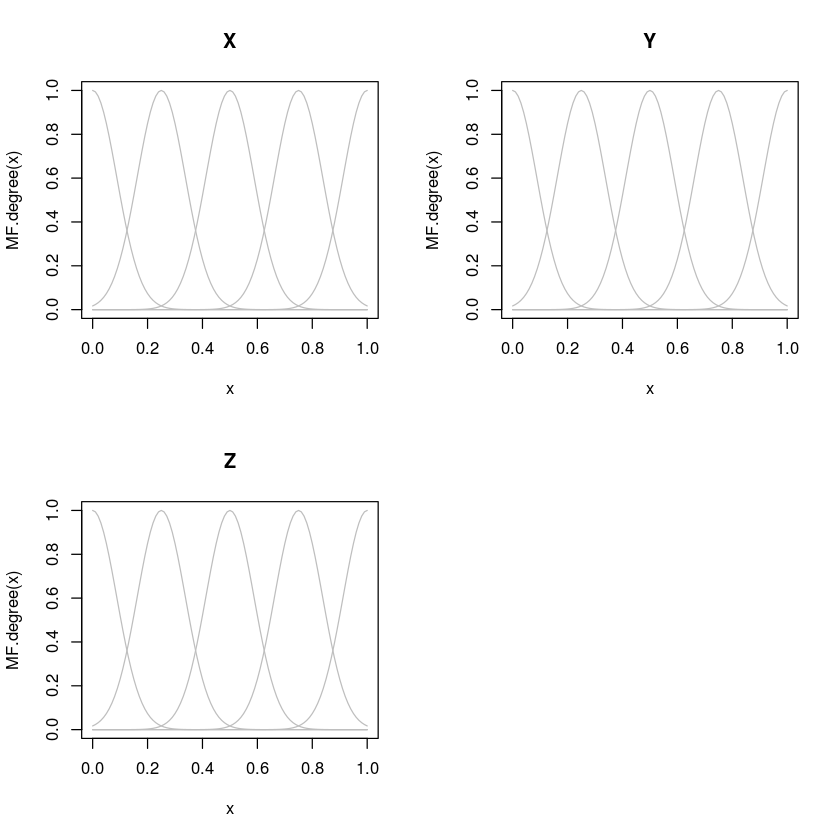

In [38]:
plotMF(mod.reg)

In [39]:
#teste para avaliar a aprendizagem 
res.test <- predict(mod.reg,data.tst)

In [41]:
head(res.test,15)

0.5559067
0.5575578
0.5581635
0.5583481
0.5583889
0.5228276
0.4581406
0.4359850
0.4254105
0.4359850
0.4581406


In [42]:
#comparar os valores encontrados com os valores reais....análise feita sobre o MSE Mean Square Error
err.MSE <-mean((real.val - res.test)^2)

In [43]:
err.MSE

[1] 0.07852261

## Problemas de Classificação também podem ser simulados 

In [44]:
data(iris)#carregando o dataset IRIS

In [46]:
head(iris,15)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [48]:
dim(iris)

[1] 150   5

In [52]:
v <- (sample(nrow(iris)))
v

[1] 139  33  98  78  88 134  53 149  20  11  80 102 119  51 106  97  42 107
 [19]  36  57 137  87  32 122  71 147 124  92  17 118 108  69  29 117 126  35
 [37]  43  83  54 131  34 115  70   6  24 138  76  21  56 112  15 101  46   7
 [55] 148  52   5  62  23  37  26  64  67 116 145 125  47  84  95  41  31 140
 [73]   4  40  25 130  81 141 135  66  45 133  16  13 142  12  60   8 110   3
 [91]  65  86  22  79  19   1  28 121  10 111 144 103  49  85  61  50 109  39
[109]  75  90 100  58   9 150 143  55  99  30 132  18  27 129 128  68 120  48
[127]  96  14  38  72  89  59  63  74  94 146 127   2 114  93  91 123  44 136
[145]  82 113  77 105  73 104

In [54]:
set.seed(2)
irisShuffled <- iris[sample(nrow(iris)),]

In [56]:
head(irisShuffled,15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.5,1.5,0.2,setosa
105,6.5,3.0,5.8,2.2,virginica
85,5.4,3.0,4.5,1.5,versicolor
25,4.8,3.4,1.9,0.2,setosa
138,6.4,3.1,5.5,1.8,virginica
137,6.3,3.4,5.6,2.4,virginica
19,5.7,3.8,1.7,0.3,setosa
120,6.0,2.2,5.0,1.5,virginica
67,5.6,3.0,4.5,1.5,versicolor
78,6.7,3.0,5.0,1.7,versicolor


In [57]:
#precisa converter a última coluna que é uma string em valores numéricos
irisShuffled[,5] <-unclass(irisShuffled[,5])

In [58]:
head(irisShuffled,15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.5,1.5,0.2,1
105,6.5,3.0,5.8,2.2,3
85,5.4,3.0,4.5,1.5,2
25,4.8,3.4,1.9,0.2,1
138,6.4,3.1,5.5,1.8,3
137,6.3,3.4,5.6,2.4,3
19,5.7,3.8,1.7,0.3,1
120,6.0,2.2,5.0,1.5,3
67,5.6,3.0,4.5,1.5,2
78,6.7,3.0,5.0,1.7,2


In [59]:
tra.iris <-irisShuffled[1:105,]

In [60]:
#treino
head(tra.iris,15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.5,1.5,0.2,1
105,6.5,3.0,5.8,2.2,3
85,5.4,3.0,4.5,1.5,2
25,4.8,3.4,1.9,0.2,1
138,6.4,3.1,5.5,1.8,3
137,6.3,3.4,5.6,2.4,3
19,5.7,3.8,1.7,0.3,1
120,6.0,2.2,5.0,1.5,3
67,5.6,3.0,4.5,1.5,2
78,6.7,3.0,5.0,1.7,2


In [61]:
#teste 
tst.iris <-irisShuffled[106:nrow(irisShuffled),1:4]

In [62]:
head(tst.iris,15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
98,6.2,2.9,4.3,1.3
40,5.1,3.4,1.5,0.2
119,7.7,2.6,6.9,2.3
7,4.6,3.4,1.4,0.3
104,6.3,2.9,5.6,1.8
100,5.7,2.8,4.1,1.3
72,6.1,2.8,4.0,1.3
77,6.8,2.8,4.8,1.4
86,6.0,3.4,4.5,1.6
30,4.7,3.2,1.6,0.2


In [63]:
#valores corretos para avaliar a acurácia do método
real.iris <-matrix(irisShuffled[106:nrow(irisShuffled),5],ncol = 1)

In [66]:
head(real.iris,10)

2
1
3
1
3
2
2
2
2
1


In [67]:
#necessário definir o intervalor de trabalho da variável de entrada piso e teto para cada variável
range.data.input <-apply(iris[,-ncol(iris)],2,range)

In [68]:
range.data.input

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
4.3,2.0,1.0,0.1
7.9,4.4,6.9,2.5


In [69]:
method.type <-"FRBCS.CHI"
control <-list(num.labels = 3, type.mf ="TRAPEZOID", type.tnorm = "MIN",type.snorm = "MAX",type.implication.func = "ZADEH") 

In [70]:
control #OK

$num.labels
[1] 3

$type.mf
[1] "TRAPEZOID"

$type.tnorm
[1] "MIN"

$type.snorm
[1] "MAX"

$type.implication.func
[1] "ZADEH"

In [71]:
mod.class <-frbs.learn(tra.iris, range.data.input,method.type,control)

In [72]:
mod.class

$num.labels
     [,1] [,2] [,3] [,4] [,5]
[1,]    3    3    3    3    3

$rule
      [,1] [,2]           [,3] [,4]     [,5]  [,6]          [,7] [,8]     [,9] 
 [1,] "IF" "Sepal.Length" "is" "small"  "and" "Sepal.Width" "is" "medium" "and"
 [2,] "IF" "Sepal.Length" "is" "large"  "and" "Sepal.Width" "is" "medium" "and"
 [3,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "large"  "and"
 [4,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "medium" "and"
 [5,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "medium" "and"
 [6,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "small"  "and"
 [7,] "IF" "Sepal.Length" "is" "medium" "and" "Sepal.Width" "is" "small"  "and"
 [8,] "IF" "Sepal.Length" "is" "small"  "and" "Sepal.Width" "is" "large"  "and"
 [9,] "IF" "Sepal.Length" "is" "large"  "and" "Sepal.Width" "is" "large"  "and"
[10,] "IF" "Sepal.Length" "is" "small"  "and" "Sepal.Width" "is" "small"  "and"
[11,] "IF" "Sepal.Length" "is" "large"  "

In [73]:
res.test<-predict(mod.class,tst.iris)

In [75]:
#valores que o modelo encontrou 
head(res.test,10)

2
1
3
1
3
2
2
2
2
1


In [76]:
summary(mod.class)

The name of model:  sim-0 
Model was trained using:  FRBCS.CHI 
The names of attributes:  Sepal.Length Sepal.Width Petal.Length Petal.Width Species 
The interval of input data:  
    Sepal.Length Sepal.Width Petal.Length Petal.Width
min          4.3         2.0          1.0         0.1
max          7.9         4.4          6.9         2.5
Type of FRBS model: 
[1] "FRBCS"
Type of membership functions: 
[1] "TRAPEZOID"
Type of t-norm method: 
[1] "Standard t-norm (min)"
Type of s-norm method: 
[1] "Standard s-norm"
Type of implication function: 
[1] "ZADEH"
The names of linguistic terms on the input variables:  
 [1] "small"  "medium" "large"  "small"  "medium" "large"  "small"  "medium"
 [9] "large"  "small"  "medium" "large" 
The parameter values of membership function on the input variable (normalized):  
     small medium large small medium large small medium large small medium
[1,]   2.0   4.00   3.0   2.0   4.00   3.0   2.0   4.00   3.0   2.0   4.00
[2,]   0.0   0.23   0.6   0.0   

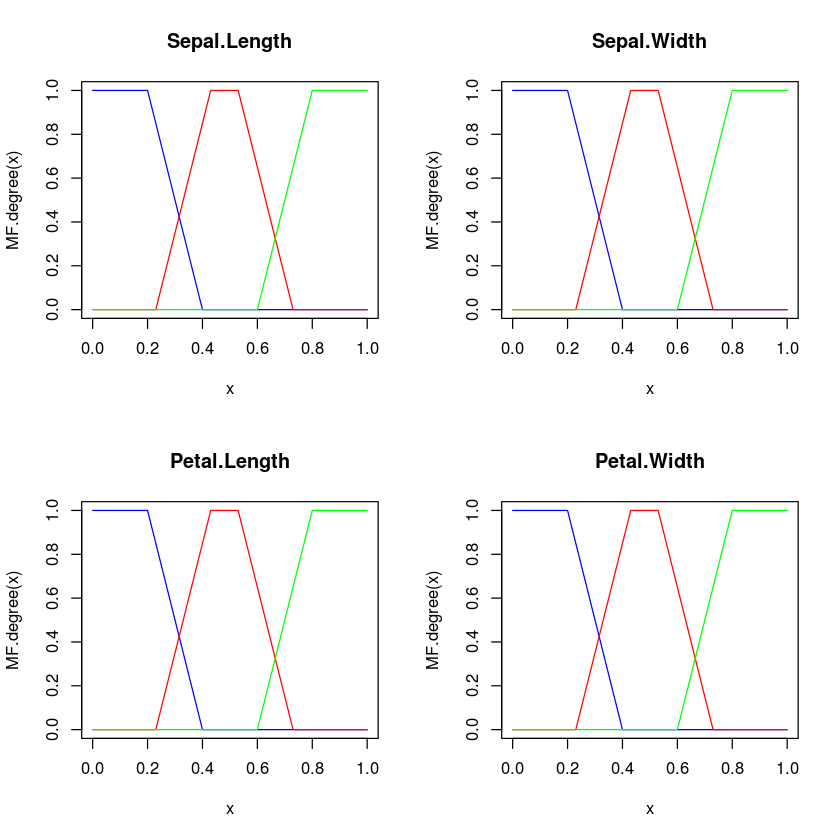

In [77]:
plotMF(mod.class)

In [78]:
err = 100*sum(real.iris!=res.test)/nrow(real.iris)

In [79]:
#porcentagem de erro.....4% de erro...
print(err)

[1] 4.444444
